In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

%matplotlib inline


In [2]:
def save_first_frame_png(video_filename: str, output_filename: str) -> None:
    """
    Extracts and saves the first frame of an MP4 video as a PNG image.

    Args:
        video_filename (str): The path to the input MP4 video file.
        output_filename (str): The desired output filename for the PNG image.

    Returns:
        None

    Raises:
        FileNotFoundError: If the video file does not exist.
        IOError: If the video file cannot be opened or the first frame cannot be read.
        Exception: If an unexpected error occurs during the process.

    Example:
        To extract the first frame from an MP4 video named "input_video.mp4" and save it as "first_frame.png":
        >>> save_first_frame_png("input_video.mp4", "first_frame.png")
    """
    try:
        # Check if the video file exists
        if not os.path.isfile(video_filename):
            raise FileNotFoundError(f"The video file '{video_filename}' does not exist.")

        # Open the video file
        video_capture = cv2.VideoCapture(video_filename)

        # Check if the video file was opened successfully
        if not video_capture.isOpened():
            raise IOError("Error: Could not open video file.")

        # Read the first frame from the video
        ret, frame = video_capture.read()

        # Check if a frame was successfully read
        if not ret:
            raise IOError("Error: Could not read the first frame.")

        # Save the first frame as a PNG image
        cv2.imwrite(output_filename, frame)

        # Release the video file
        video_capture.release()
        print(f"The first frame has been saved as {output_filename}")

    except FileNotFoundError as e:
        print(f"FileNotFoundError: {str(e)}")
    except Exception as e:
        print(f"An error occurred: {str(e)}")


save_first_frame_png("20_sec_crop.mp4", "first_20.png")

The first frame has been saved as first_20.png


In [3]:
def extract_first_frame(video_filename: str) -> np.ndarray:
    """
    Extracts the first frame of an MP4 video and returns it as a NumPy array.

    Args:
        video_filename (str): The path to the input MP4 video file.

    Returns:
        np.ndarray: A NumPy array representing the first frame of the video.

    Raises:
        FileNotFoundError: If the video file does not exist.
        IOError: If the video file cannot be opened or the first frame cannot be read.
        Exception: If an unexpected error occurs during the process.

    Example:
        To extract the first frame from an MP4 video named "input_video.mp4":
        >>> first_frame = extract_first_frame("input_video.mp4")
    """
    try:
        # Check if the video file exists
        if not os.path.isfile(video_filename):
            raise FileNotFoundError(f"The video file '{video_filename}' does not exist.")

        # Open the video file
        video_capture = cv2.VideoCapture(video_filename)

        # Check if the video file was opened successfully
        if not video_capture.isOpened():
            raise IOError("Error: Could not open video file.")

        # Read the first frame from the video
        ret, frame = video_capture.read()

        # Check if a frame was successfully read
        if not ret:
            raise IOError("Error: Could not read the first frame.")

        # Release the video file
        video_capture.release()

        # Convert the frame to a NumPy array
        return np.asarray(frame)

    except FileNotFoundError as e:
        print(f"FileNotFoundError: {str(e)}")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Usage example:
first_frame = extract_first_frame("mine_shortened_no_crop.mp4")

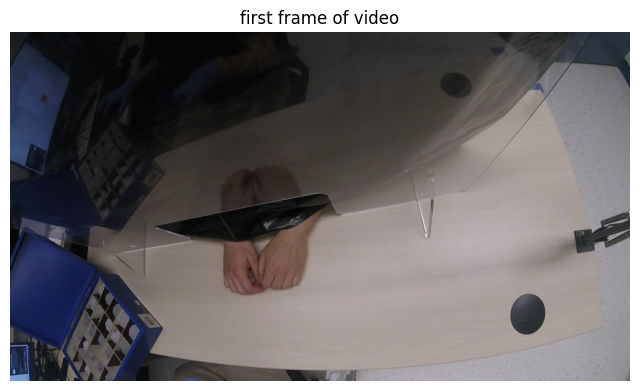

In [33]:
def display_image_with_matplotlib(image: np.ndarray, title: str = "Image") -> None:
    """
    Displays a NumPy image (array) using matplotlib.

    Args:
        image (numpy.ndarray): The image to be displayed (as a NumPy array).
        title (str): The title for the displayed image (default is "Image").

    Returns:
        None
    """
    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()

first_frame = extract_first_frame("mine_shortened_no_crop.mp4")
display_image_with_matplotlib(first_frame, "first frame of video")

HAND n dims:
x: (771, 901), y: x in (642, 790)
HAND n dims:
x: (664, 780), y: x in (660, 801)


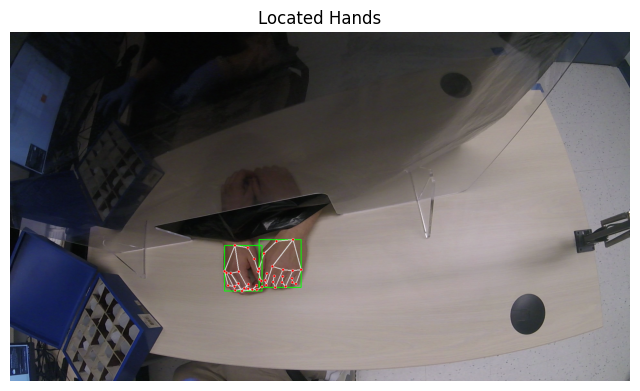

((664, 901), (642, 801))


In [40]:
# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2)

def detect_hands_and_draw_bbox(image) -> tuple[np.ndarray, NotImplemented, tuple[tuple[int, int], tuple[int, int]]]:
    """
    Detects hands in the input image and draws a bounding box around each detected hand,
    along with landmarks for each hand.

    Args:
        image (numpy.ndarray): The input image where hands are to be detected. It is assumed
            to be in BGR color format.

    Returns:
        tuple:
            numpy.ndarray: The output image with bounding boxes and landmarks drawn on it.
            mediapipe.python.solution_base.SolutionOutputs: The MediaPipe detection results,
                containing information about the detected hands and landmarks.

    Examples:
        >>> first_frame = extract_first_frame("path/to/video.mp4")
        >>> processed_image, detection_result = detect_hands_and_draw_bbox(first_frame)
        >>> display_image_with_matplotlib(processed_image, "Processed Image")

    Notes:
        - The input image should be in BGR color format, typically obtained using OpenCV.
        - The function uses the MediaPipe Hands solution for hand detection.
        - This function modifies the input image in-place. If the original image is needed,
          a copy should be created before calling this function.
        - If no hands are detected, the function returns the unmodified image and a result object
          with empty landmark fields.
    """
    # Convert the BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform hand detection
    mp_result = hands.process(image_rgb)
    
    x_output = []
    y_output = []
    
    if mp_result.multi_hand_landmarks:
        # print("in if")
        # Loop through each hand detected
        for hand_landmarks in mp_result.multi_hand_landmarks:
            # Find the bounding box coordinates
            x_coords = [lm.x * image.shape[1] for lm in hand_landmarks.landmark]
            y_coords = [lm.y * image.shape[0] for lm in hand_landmarks.landmark]
            x_min, x_max = int(min(x_coords)), int(max(x_coords))
            y_min, y_max = int(min(y_coords)), int(max(y_coords))

            # Draw the bounding box
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            
            # Draw the hand landmarks
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            print(f"HAND n dims:\n"
                  f"x: ({x_min}, {x_max}), y: x in ({y_min}, {y_max})")
            
            # add boundary to output
            if not x_output:
                x_output = [x_min, x_max]
            else:
                if x_min < x_output[0]:
                    x_output[0] = x_min
                if x_max > x_output[1]:
                    x_output[1] = x_max
                    
            if not y_output:
                y_output = [y_min, y_max]
            else:
                if y_min < y_output[0]:
                    y_output[0] = y_min
                if y_max > y_output[1]:
                    y_output[1] = y_max

            
    return image, mp_result, (tuple(x_output), tuple(y_output))

# Usage example
first_frame = extract_first_frame("mine_shortened_no_crop.mp4")
processed_image, detection_result, output_tuple = detect_hands_and_draw_bbox(first_frame.copy())
display_image_with_matplotlib(processed_image, "Located Hands")

print(output_tuple)


# NEED SOMETHING TO MAKE SURE WITHIN BOUNDS OF IMAGE HERE

deltax = 237, deltay = 159


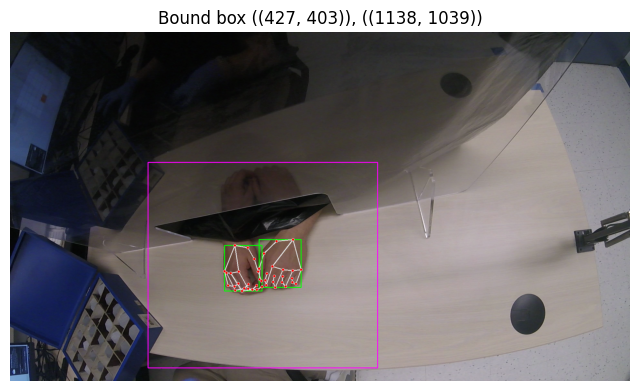

In [62]:
def image_bounds_multiple_method(min_max_tuple: tuple, x_multiple: float = 1, y_multiple: float = 1.5) -> tuple[tuple[int, int], tuple[int, int]]:
    """
    Given coordinates of bounding box for hands, returns coordinates bounding box for whole image. Bounding box has padding around hands as determined by x_multiple and y_multiple.
    
    Args:
        min_max_tuple (tuple[tuple[int, int], tuple[int, int]]): bounding box around hand coordinates of form ((x_min, x_max), (y_min, y_max)). generated by detect_hands_and_draw_bbox()
        x_multiple (float): Multiple of hand bounding box length in x dimension to be padded around left and right of hands
        y_multiple (float): Multiple of hand bounding box length in y dimension to be padded around top and bottom of hands

    Returns:
        bounding box coordinates: ((x_min, x_max), (y_min, y_max)):

    """
    x = min_max_tuple[0]
    y = min_max_tuple[1]
    delta_x = x[1] - x[0]
    delta_y = y[1] - y[0]
    print(f"deltax = {delta_x}, deltay = {delta_y}")
    x_bounds = (int(x[0] - x_multiple * delta_x), int(x[1] + x_multiple * delta_x))
    y_bounds = (int(y[0] - y_multiple * delta_y), int(y[1] + y_multiple * delta_y))
    return x_bounds, y_bounds
    
bounds_multiple = image_bounds_multiple_method(output_tuple)
display_image_with_matplotlib(cv2.rectangle(processed_image.copy(),
                                            pt1=(bounds_multiple[0][0], bounds_multiple[1][0]),
                                            pt2=(bounds_multiple[0][1], bounds_multiple[1][1]), 
                                            color=(255, 0, 255), thickness=2), 
                              f"Bound box ({(bounds_multiple[0][0], bounds_multiple[1][0])}), ({bounds_multiple[0][1], bounds_multiple[1][1]})")

deltax = 237, deltay = 159
x cent = 782, y_cent = 721


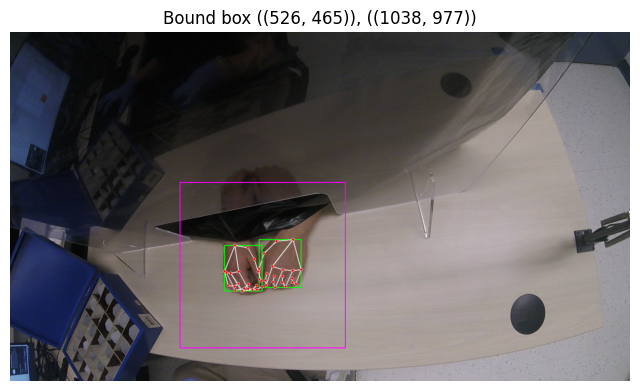

In [66]:
def image_bounds_set_size_method(min_max_tuple: tuple, size_x: int = 512, size_y: int = 512) -> tuple[tuple[int, int], tuple[int, int]]:
    """
    Given coordinates of bounding box for hands, returns coordinates bounding box for whole image. Bounding box of predetermined size (size_x, size_y) centered around the hands
    
    Args:
        min_max_tuple (tuple[tuple[int, int], tuple[int, int]]): bounding box around hand coordinates of form ((x_min, x_max), (y_min, y_max)). generated by detect_hands_and_draw_bbox()
        size_x (int): x dimension of resulting bounding box
        size_y (int): y dimension of resulting bounding box  

    Returns:
        bounding box coordinates: ((x_min, x_max), (y_min, y_max)):

    """
    x = min_max_tuple[0]
    y = min_max_tuple[1]
    delta_x = x[1] - x[0]
    delta_y = y[1] - y[0]
    
    x_center = x[0] + delta_x // 2
    y_center = y[0] + delta_y // 2

    # print(f"deltax = {delta_x}, deltay = {delta_y}")
    # print(f"x cent = {x_center}, y_cent = {y_center}")
    x_bounds = (x_center - size_x // 2, x_center + size_x // 2)
    y_bounds = (y_center - size_x // 2, y_center + size_y // 2)
    return x_bounds, y_bounds

bounds_multiple = image_bounds_set_size_method(output_tuple)
display_image_with_matplotlib(cv2.rectangle(processed_image.copy(),
                                            pt1=(bounds_multiple[0][0], bounds_multiple[1][0]),
                                            pt2=(bounds_multiple[0][1], bounds_multiple[1][1]), 
                                            color=(255, 0, 255), thickness=2), 
                              f"Bound box ({(bounds_multiple[0][0], bounds_multiple[1][0])}), ({bounds_multiple[0][1], bounds_multiple[1][1]})")